# Laryngeal Voice Disorder Classification

## Data Loading

In [ ]:
# Importing dataset via kaggle

!kaggle datasets download -d daniilkrasnoproshin/healthy-vs-laryngeal-disorder-classification

In [ ]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('', 'r')
zip_ref.extractall('')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('healthy_vs_laryngeal_disorder_classification.csv')

In [6]:
df.head(5)

,idx,Jitter,Shimmer,GNE,Irregularity,Noise,OverallSeverity,mean_F0,SD_F0,Max_F0,Min_F0,Diagnosis
0,1,0.09,7.41,0.83,0.88,0.37,0.77,188.48,0.36,189.39,186.57,healthy
1,2,0.07,8.35,0.78,0.85,0.45,0.76,125.05,0.14,125.31,124.69,healthy
2,3,0.15,11.58,0.44,1.18,1.04,1.09,214.37,0.40,215.52,212.77,healthy
3,4,0.39,7.70,0.35,1.17,1.54,1.14,303.73,0.52,306.75,303.03,healthy
4,5,0.43,9.69,0.51,1.04,0.89,0.96,165.92,6.97,173.61,85.62,healthy


In [7]:
df.shape

(131, 12)

In [8]:
df.size

1572

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idx              131 non-null    int64  
 1   Jitter           131 non-null    float64
 2   Shimmer          131 non-null    float64
 3   GNE              131 non-null    float64
 4   Irregularity     131 non-null    float64
 5   Noise            131 non-null    float64
 6   OverallSeverity  131 non-null    float64
 7   mean_F0          131 non-null    float64
 8   SD_F0            131 non-null    float64
 9   Max_F0           131 non-null    float64
 10  Min_F0           131 non-null    float64
 11  Diagnosis        131 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 12.4+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idx,131.0,66.000000,37.960506,1.00,33.500,66.00,98.500,131.00
Jitter,131.0,1.961450,4.805058,0.03,0.160,0.31,1.700,31.58
Shimmer,131.0,13.820687,9.608891,2.70,8.265,11.06,16.320,62.42
GNE,131.0,0.590458,0.218107,0.15,0.405,0.61,0.780,0.96
Irregularity,131.0,1.340153,0.500294,0.50,0.980,1.16,1.670,2.79
Noise,131.0,0.922366,0.613509,0.16,0.455,0.73,1.255,2.66
OverallSeverity,131.0,1.206260,0.464532,0.47,0.875,1.02,1.485,2.60
mean_F0,131.0,204.198092,58.551715,71.72,160.205,199.32,244.125,333.33
SD_F0,131.0,5.388168,9.553036,-1.00,0.520,0.97,2.700,48.81
Max_F0,131.0,217.932061,60.203629,72.05,177.635,215.52,260.420,333.33


In [11]:
df.isnull().sum()

idx                0
Jitter             0
Shimmer            0
GNE                0
Irregularity       0
Noise              0
OverallSeverity    0
mean_F0            0
SD_F0              0
Max_F0             0
Min_F0             0
Diagnosis          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

idx                131
Jitter              84
Shimmer            127
GNE                 69
Irregularity        90
Noise               92
OverallSeverity     80
mean_F0            131
SD_F0              110
Max_F0             100
Min_F0             116
Diagnosis            3
dtype: int64

## Data Preprocessing

In [15]:
# Label Encoding Class Coloumn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder

df['Diagnosis'] = le().fit_transform(df['Diagnosis'])

In [16]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [17]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model Training

In [18]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [19]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [20]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8148148148148148, 0.8518518518518519, 0.9259259259259259, 0.9259259259259259, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.8518518518518519]


## Model Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.64      0.78        11
           2       1.00      0.86      0.92         7

    accuracy                           0.81        27
   macro avg       0.88      0.83      0.83        27
weighted avg       0.88      0.81      0.82        27

Confusion Matrix:
 [[9 0 0]
 [4 7 0]
 [1 0 6]]


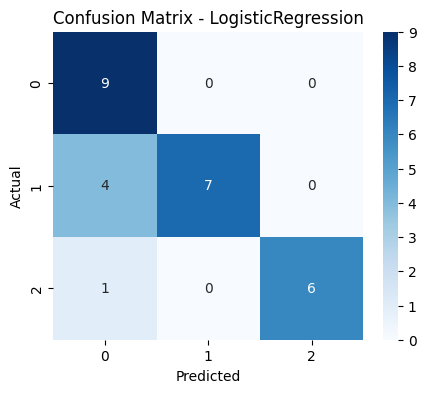

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.85      1.00      0.92        11
           2       0.86      0.86      0.86         7

    accuracy                           0.85        27
   macro avg       0.85      0.84      0.84        27
weighted avg       0.85      0.85      0.85        27

Confusion Matrix:
 [[ 6  2  1]
 [ 0 11  0]
 [ 1  0  6]]


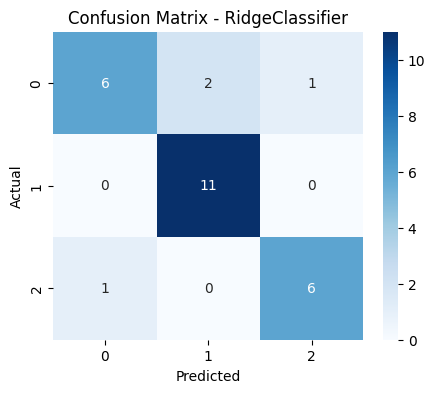

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11
           2       1.00      1.00      1.00         7

    accuracy                           0.93        27
   macro avg       0.94      0.94      0.93        27
weighted avg       0.94      0.93      0.93        27

Confusion Matrix:
 [[9 0 0]
 [2 9 0]
 [0 0 7]]


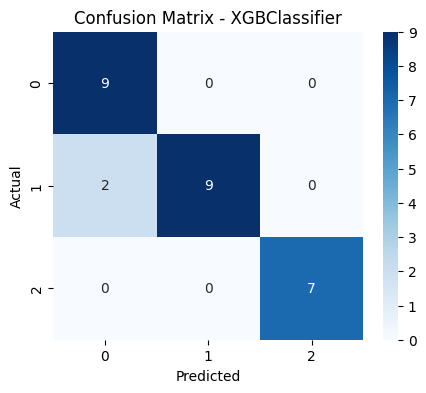

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       0.86      0.86      0.86         7

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27

Confusion Matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 1  0  6]]


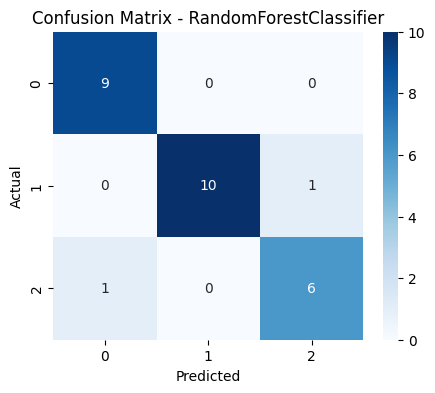

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
 [[ 9  0  0]
 [ 1 10  0]
 [ 0  0  7]]


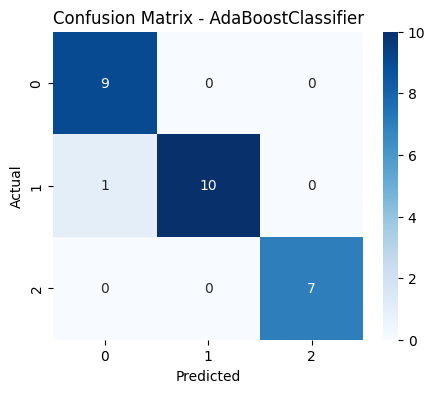

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
 [[ 9  0  0]
 [ 1 10  0]
 [ 0  0  7]]


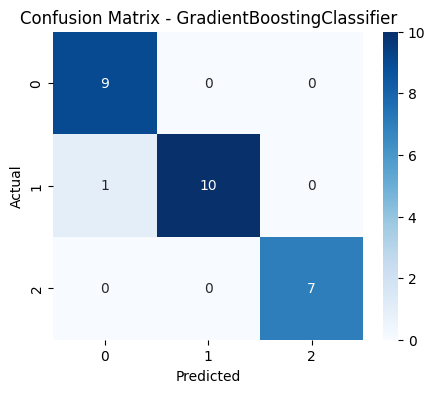

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
 [[ 9  0  0]
 [ 1 10  0]
 [ 0  0  7]]


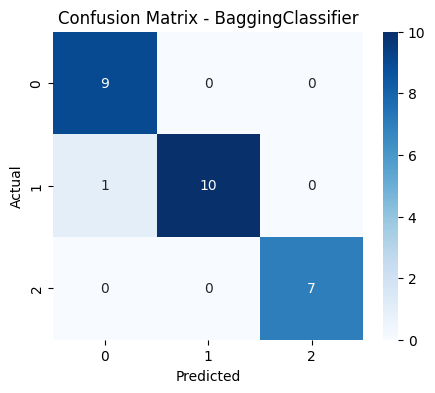

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
 [[ 9  0  0]
 [ 1 10  0]
 [ 0  0  7]]


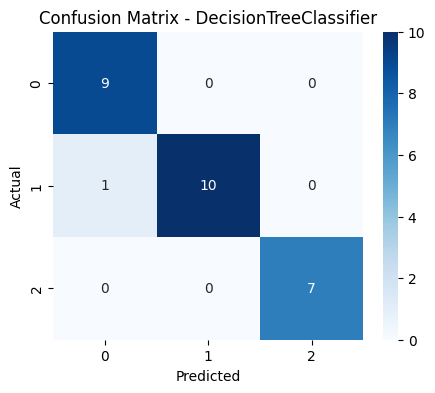

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      1.00      1.00        11
           2       1.00      0.43      0.60         7

    accuracy                           0.85        27
   macro avg       0.90      0.81      0.81        27
weighted avg       0.90      0.85      0.84        27

Confusion Matrix:
 [[ 9  0  0]
 [ 0 11  0]
 [ 4  0  3]]


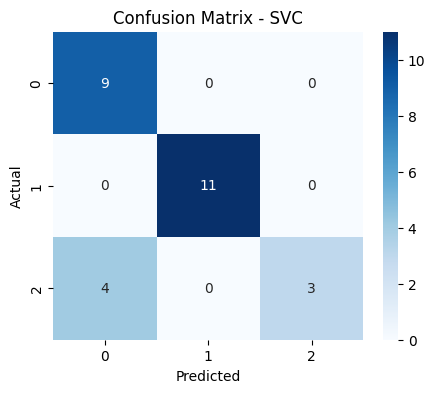

In [23]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()